# Preprocess pm25 data

In [62]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime

In [63]:
def parser(x, y):
    return datetime.strptime(x + y, '%Y%m%d%H')

df = pd.read_csv('data/beijing_20160101-20161231/beijing_all_20160101.csv', parse_dates={'Timestamp':['date', 'hour']}, index_col=0, date_parser=parser)

In [64]:
df

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,PM2.5,200.0,193.0,183.0,195.0,209,218.0,155.0,201.0,84,...,57.0,201.0,316.0,305.0,348.0,205.0,204.0,214,236.0,250.0
2016-01-01 00:00:00,PM2.5_24h,70.0,64.0,63.0,68.0,65,68.0,75.0,120.0,58,...,29.0,75.0,156.0,169.0,197.0,77.0,80.0,74,80.0,81.0
2016-01-01 00:00:00,PM10,209.0,209.0,244.0,200.0,268,NaN,166.0,250.0,118,...,NaN,NaN,NaN,378.0,NaN,214.0,213.0,276,271.0,271.0
2016-01-01 00:00:00,PM10_24h,110.0,139.0,123.0,148.0,189,NaN,98.0,170.0,98,...,NaN,NaN,NaN,283.0,NaN,110.0,128.0,112,119.0,151.0
2016-01-01 00:00:00,AQI,94.0,95.0,87.0,100.0,120,92.0,100.0,150.0,72,...,67.0,100.0,206.0,219.0,247.0,104.0,107.0,99,107.0,108.0
2016-01-01 01:00:00,PM2.5,193.0,183.0,193.0,190.0,211,251.0,141.0,178.0,102,...,57.0,252.0,307.0,318.0,328.0,200.0,195.0,227,201.0,281.0
2016-01-01 01:00:00,PM2.5_24h,77.0,72.0,70.0,76.0,73,77.0,80.0,123.0,63,...,31.0,84.0,163.0,180.0,200.0,85.0,87.0,82,87.0,92.0
2016-01-01 01:00:00,PM10,203.0,187.0,233.0,203.0,248,NaN,145.0,207.0,134,...,NaN,NaN,NaN,388.0,NaN,207.0,211.0,267,221.0,311.0
2016-01-01 01:00:00,PM10_24h,116.0,143.0,132.0,153.0,195,NaN,102.0,170.0,100,...,NaN,NaN,NaN,291.0,NaN,119.0,133.0,120,128.0,160.0


In [45]:
pm25 = df.loc[df['type'] == 'PM2.5']

In [46]:
pm25

,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,PM2.5,200.0,193.0,183.0,195.0,209,218.0,155.0,201.0,84,...,57.0,201.0,316.0,305.0,348.0,205.0,204.0,214,236.0,250.0
2016-01-01 01:00:00,PM2.5,193.0,183.0,193.0,190.0,211,251.0,141.0,178.0,102,...,57.0,252.0,307.0,318.0,328.0,200.0,195.0,227,201.0,281.0
2016-01-01 02:00:00,PM2.5,219.0,178.0,181.0,205.0,167,233.0,121.0,169.0,106,...,60.0,239.0,297.0,331.0,326.0,213.0,214.0,196,203.0,283.0
2016-01-01 03:00:00,PM2.5,187.0,195.0,148.0,199.0,136,200.0,119.0,165.0,115,...,74.0,234.0,311.0,327.0,299.0,197.0,210.0,148,211.0,254.0
2016-01-01 04:00:00,PM2.5,160.0,179.0,111.0,146.0,108,220.0,121.0,179.0,125,...,80.0,233.0,273.0,287.0,220.0,152.0,162.0,109,168.0,273.0
2016-01-01 05:00:00,PM2.5,116.0,134.0,94.0,111.0,93,204.0,118.0,173.0,121,...,78.0,236.0,305.0,264.0,159.0,108.0,120.0,103,127.0,240.0
2016-01-01 06:00:00,PM2.5,111.0,103.0,95.0,95.0,107,168.0,92.0,165.0,125,...,79.0,238.0,300.0,237.0,143.0,98.0,105.0,99,108.0,203.0
2016-01-01 07:00:00,PM2.5,124.0,102.0,94.0,108.0,113,121.0,94.0,156.0,121,...,79.0,231.0,289.0,226.0,153.0,104.0,111.0,111,110.0,186.0
2016-01-01 08:00:00,PM2.5,106.0,109.0,100.0,113.0,89,117.0,110.0,164.0,112,...,85.0,236.0,274.0,289.0,171.0,112.0,125.0,116,122.0,164.0


In [68]:
path1 = 'data/beijing_20140101-20141231/'
path2 = 'data/beijing_20150101-20151231/'
path3 = 'data/beijing_20160101-20161231/'
path4 = 'data/beijing_20170101-20171231/'
allfiles = glob.glob(path1 + 'beijing_all*.csv') + glob.glob(path2 + 'beijing_all*.csv')\
+ glob.glob(path3 + 'beijing_all*.csv') + glob.glob(path4 + 'beijing_all*.csv')
df_list = []
data = pd.DataFrame()
for file in allfiles:
    try:
        print(file)
        df = pd.read_csv(file, parse_dates={'Timestamp':['date', 'hour']}, index_col = 0, date_parser=parser)
        pm25 = df.loc[df['type'] == 'PM2.5']
        df_list.append(pm25['东四'])
    except (pd.errors.EmptyDataError, ValueError) as e:
        print(e)
data = pd.concat(df_list)
data.shape

data/beijing_20140101-20141231/beijing_all_20141121.csv
data/beijing_20140101-20141231/beijing_all_20140217.csv
data/beijing_20140101-20141231/beijing_all_20141109.csv
data/beijing_20140101-20141231/beijing_all_20140203.csv
data/beijing_20140101-20141231/beijing_all_20140820.csv
data/beijing_20140101-20141231/beijing_all_20140808.csv
data/beijing_20140101-20141231/beijing_all_20140607.csv
data/beijing_20140101-20141231/beijing_all_20140613.csv
data/beijing_20140101-20141231/beijing_all_20140405.csv
data/beijing_20140101-20141231/beijing_all_20140411.csv
data/beijing_20140101-20141231/beijing_all_20140410.csv
data/beijing_20140101-20141231/beijing_all_20140404.csv
data/beijing_20140101-20141231/beijing_all_20140612.csv
data/beijing_20140101-20141231/beijing_all_20140606.csv
data/beijing_20140101-20141231/beijing_all_20140809.csv
data/beijing_20140101-20141231/beijing_all_20140821.csv
data/beijing_20140101-20141231/beijing_all_20140202.csv
data/beijing_20140101-20141231/beijing_all_20141

data/beijing_20140101-20141231/beijing_all_20140304.csv
data/beijing_20140101-20141231/beijing_all_20141230.csv
data/beijing_20140101-20141231/beijing_all_20141224.csv
data/beijing_20140101-20141231/beijing_all_20140112.csv
data/beijing_20140101-20141231/beijing_all_20141218.csv
data/beijing_20140101-20141231/beijing_all_20140106.csv
data/beijing_20140101-20141231/beijing_all_20140728.csv
data/beijing_20140101-20141231/beijing_all_20140714.csv
data/beijing_20140101-20141231/beijing_all_20140927.csv
data/beijing_20140101-20141231/beijing_all_20140502.csv
data/beijing_20140101-20141231/beijing_all_20140516.csv
data/beijing_20140101-20141231/beijing_all_20140527.csv
data/beijing_20140101-20141231/beijing_all_20140916.csv
data/beijing_20140101-20141231/beijing_all_20140902.csv
data/beijing_20140101-20141231/beijing_all_20140719.csv
data/beijing_20140101-20141231/beijing_all_20140731.csv
data/beijing_20140101-20141231/beijing_all_20140725.csv
data/beijing_20140101-20141231/beijing_all_20141

data/beijing_20140101-20141231/beijing_all_20140812.csv
data/beijing_20140101-20141231/beijing_all_20141113.csv
data/beijing_20140101-20141231/beijing_all_20141107.csv
data/beijing_20140101-20141231/beijing_all_20140219.csv
data/beijing_20140101-20141231/beijing_all_20140225.csv
data/beijing_20140101-20141231/beijing_all_20140227.csv
data/beijing_20140101-20141231/beijing_all_20141111.csv
data/beijing_20140101-20141231/beijing_all_20141105.csv
data/beijing_20140101-20141231/beijing_all_20140804.csv
data/beijing_20140101-20141231/beijing_all_20140810.csv
data/beijing_20140101-20141231/beijing_all_20140623.csv
data/beijing_20140101-20141231/beijing_all_20140421.csv
data/beijing_20140101-20141231/beijing_all_20140409.csv
data/beijing_20140101-20141231/beijing_all_20140408.csv
data/beijing_20140101-20141231/beijing_all_20140420.csv
data/beijing_20140101-20141231/beijing_all_20140622.csv
data/beijing_20140101-20141231/beijing_all_20140811.csv
data/beijing_20140101-20141231/beijing_all_20140

data/beijing_20150101-20151231/beijing_all_20150515.csv
data/beijing_20150101-20151231/beijing_all_20150529.csv
data/beijing_20150101-20151231/beijing_all_20150703.csv
data/beijing_20150101-20151231/beijing_all_20150717.csv
data/beijing_20150101-20151231/beijing_all_20150918.csv
data/beijing_20150101-20151231/beijing_all_20150924.csv
data/beijing_20150101-20151231/beijing_all_20150930.csv
data/beijing_20150101-20151231/beijing_all_20150908.csv
data/beijing_20150101-20151231/beijing_all_20150920.csv
data/beijing_20150101-20151231/beijing_all_20150713.csv
data/beijing_20150101-20151231/beijing_all_20150707.csv
data/beijing_20150101-20151231/beijing_all_20150511.csv
data/beijing_20150101-20151231/beijing_all_20150505.csv
data/beijing_20150101-20151231/beijing_all_20150303.csv
data/beijing_20150101-20151231/beijing_all_20150317.csv
data/beijing_20150101-20151231/beijing_all_20151009.csv
data/beijing_20150101-20151231/beijing_all_20151021.csv
data/beijing_20150101-20151231/beijing_all_20150

data/beijing_20150101-20151231/beijing_all_20150903.csv
data/beijing_20150101-20151231/beijing_all_20151105.csv
data/beijing_20150101-20151231/beijing_all_20151111.csv
data/beijing_20150101-20151231/beijing_all_20150227.csv
data/beijing_20150101-20151231/beijing_all_20150409.csv
data/beijing_20150101-20151231/beijing_all_20150421.csv
data/beijing_20150101-20151231/beijing_all_20150810.csv
data/beijing_20150101-20151231/beijing_all_20150804.csv
data/beijing_20150101-20151231/beijing_all_20150623.csv
data/beijing_20150101-20151231/beijing_all_20150622.csv
data/beijing_20150101-20151231/beijing_all_20150805.csv
data/beijing_20150101-20151231/beijing_all_20150811.csv
data/beijing_20150101-20151231/beijing_all_20150420.csv
data/beijing_20150101-20151231/beijing_all_20150408.csv
data/beijing_20150101-20151231/beijing_all_20150226.csv
data/beijing_20150101-20151231/beijing_all_20151110.csv
data/beijing_20150101-20151231/beijing_all_20151104.csv
data/beijing_20150101-20151231/beijing_all_20151

data/beijing_20160101-20161231/beijing_all_20161023.csv
data/beijing_20160101-20161231/beijing_all_20160329.csv
data/beijing_20160101-20161231/beijing_all_20160301.csv
data/beijing_20160101-20161231/beijing_all_20160315.csv
data/beijing_20160101-20161231/beijing_all_20161221.csv
data/beijing_20160101-20161231/beijing_all_20160103.csv
data/beijing_20160101-20161231/beijing_all_20160117.csv
data/beijing_20160101-20161231/beijing_all_20161209.csv
data/beijing_20160101-20161231/beijing_all_20160101.csv
data/beijing_20160101-20161231/beijing_all_20160115.csv
data/beijing_20160101-20161231/beijing_all_20161223.csv
data/beijing_20160101-20161231/beijing_all_20160129.csv
data/beijing_20160101-20161231/beijing_all_20160303.csv
data/beijing_20160101-20161231/beijing_all_20160317.csv
data/beijing_20160101-20161231/beijing_all_20161009.csv
data/beijing_20160101-20161231/beijing_all_20161021.csv
data/beijing_20160101-20161231/beijing_all_20160511.csv
data/beijing_20160101-20161231/beijing_all_20160

data/beijing_20160101-20161231/beijing_all_20160209.csv
data/beijing_20160101-20161231/beijing_all_20161103.csv
data/beijing_20160101-20161231/beijing_all_20161102.csv
data/beijing_20160101-20161231/beijing_all_20160208.csv
data/beijing_20160101-20161231/beijing_all_20161116.csv
data/beijing_20160101-20161231/beijing_all_20160220.csv
data/beijing_20160101-20161231/beijing_all_20160426.csv
data/beijing_20160101-20161231/beijing_all_20160817.csv
data/beijing_20160101-20161231/beijing_all_20160803.csv
data/beijing_20160101-20161231/beijing_all_20160618.csv
data/beijing_20160101-20161231/beijing_all_20160630.csv
data/beijing_20160101-20161231/beijing_all_20160624.csv
data/beijing_20160101-20161231/beijing_all_20161207.csv
data/beijing_20160101-20161231/beijing_all_20160119.csv
data/beijing_20160101-20161231/beijing_all_20161213.csv
data/beijing_20160101-20161231/beijing_all_20160125.csv
data/beijing_20160101-20161231/beijing_all_20160131.csv
data/beijing_20160101-20161231/beijing_all_20161

data/beijing_20170101-20171231/beijing_all_20171209.csv
data/beijing_20170101-20171231/beijing_all_20170117.csv
data/beijing_20170101-20171231/beijing_all_20170103.csv
data/beijing_20170101-20171231/beijing_all_20171221.csv
data/beijing_20170101-20171231/beijing_all_20170315.csv
data/beijing_20170101-20171231/beijing_all_20170301.csv
data/beijing_20170101-20171231/beijing_all_20170329.csv
data/beijing_20170101-20171231/beijing_all_20171023.csv
data/beijing_20170101-20171231/beijing_all_20170305.csv
data/beijing_20170101-20171231/beijing_all_20170311.csv
data/beijing_20170101-20171231/beijing_all_20171027.csv
data/beijing_20170101-20171231/beijing_all_20170107.csv
data/beijing_20170101-20171231/beijing_all_20171219.csv
data/beijing_20170101-20171231/beijing_all_20170113.csv
data/beijing_20170101-20171231/beijing_all_20171225.csv
data/beijing_20170101-20171231/beijing_all_20171231.csv
data/beijing_20170101-20171231/beijing_all_20170715.csv
data/beijing_20170101-20171231/beijing_all_20170

data/beijing_20170101-20171231/beijing_all_20171115.csv
data/beijing_20170101-20171231/beijing_all_20170828.csv
data/beijing_20170101-20171231/beijing_all_20170814.csv
data/beijing_20170101-20171231/beijing_all_20170627.csv
data/beijing_20170101-20171231/beijing_all_20170425.csv
data/beijing_20170101-20171231/beijing_all_20170419.csv
data/beijing_20170101-20171231/beijing_all_20170421.csv
data/beijing_20170101-20171231/beijing_all_20170409.csv
data/beijing_20170101-20171231/beijing_all_20170623.csv
data/beijing_20170101-20171231/beijing_all_20170804.csv
data/beijing_20170101-20171231/beijing_all_20170810.csv
data/beijing_20170101-20171231/beijing_all_20170227.csv
data/beijing_20170101-20171231/beijing_all_20171111.csv
data/beijing_20170101-20171231/beijing_all_20171105.csv
data/beijing_20170101-20171231/beijing_all_20171104.csv
data/beijing_20170101-20171231/beijing_all_20171110.csv
data/beijing_20170101-20171231/beijing_all_20170226.csv
data/beijing_20170101-20171231/beijing_all_20170

(33863,)

In [75]:
data = data.sort_index()
data.to_csv('pm25.csv', header=None)

In [76]:
pd.read_csv('pm25.csv', parse_dates=True, index_col=0, header=None)

,1
0,
2014-01-01 00:00:00,35.0
2014-01-01 01:00:00,66.0
2014-01-01 02:00:00,70.0
2014-01-01 03:00:00,71.0
2014-01-01 04:00:00,82.0
2014-01-01 05:00:00,93.0
2014-01-01 06:00:00,92.0
2014-01-01 07:00:00,74.0
2014-01-01 08:00:00,51.0


# Preprocess nc file

In [32]:
from netCDF4 import Dataset, num2date 
import pandas as pd

In [33]:
nc_data = Dataset("output.nc", "r", format="NETCDF4")
nc_data_sf = Dataset("test.nc", "r", format="NETCDF4")

In [34]:
nc_data.variables['longitude'][:]

array([115.   , 115.125, 115.25 , 115.375, 115.5  , 115.625, 115.75 ,
       115.875, 116.   , 116.125, 116.25 , 116.375, 116.5  , 116.625,
       116.75 , 116.875, 117.   ], dtype=float32)

In [35]:
nc_data.variables['time'][:].shape

(5844,)

In [36]:
print(nc_data.variables['time'].units)
nc_data.variables['level'][:]

hours since 1900-01-01 00:00:0.0


array([ 500,  850, 1000], dtype=int32)

In [54]:
times = num2date(nc_data_sf.variables['time'][:], nc_data.variables['time'].units)

In [55]:
times.shape

(5844,)

In [56]:
nc_data_sf.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (17,)
              filling off), ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (17,)
              filling off), ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:0.0
                  long_name: time
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (5844,)
              filling off), ('sp', <class 'netCDF4._netCDF4.Variable'>
              int16 sp(time, latitude, longitude)
                  scale_factor: 0.29568118

In [57]:
nc_data.variables['longitude'][:][11]

116.375

In [58]:
nc_data.variables['latitude'][:][9]

39.875

In [59]:
nc_data_sf.variables['t2m'][:, 9, 11]

array([270.48736778, 283.83861056, 273.00932846, ..., 277.34274821,
       270.39135405, 266.95619609])

In [43]:
t2m = pd.Series(nc_data.variables['t2m'][:, 9, 11], index=times)
t2m

KeyError: 't2m'

In [44]:
t2m.shift(8, freq = 'H')

NameError: name 't2m' is not defined

In [77]:
pm25_data = pd.read_csv('pm25.csv', parse_dates=True, index_col=0, header=None)

t2m = pd.Series(nc_data_sf.variables['t2m'][:, 9, 11], index=times)
# shift time zone
t2m = t2m.shift(8, freq='H')
d2m = pd.Series(nc_data_sf.variables['d2m'][:, 9, 11], index=times)
d2m = d2m.shift(8, freq='H')
u10 = pd.Series(nc_data_sf.variables['u10'][:, 9, 11], index=times)
u10 = u10.shift(8, freq='H')
v10 = pd.Series(nc_data_sf.variables['v10'][:, 9, 11], index=times)
v10 = v10.shift(8, freq='H')
sp = pd.Series(nc_data_sf.variables['sp'][:, 9, 11], index=times).shift(8, freq='H')

In [78]:
nc_data.variables
# t, q, u, v, w
t500 = pd.Series(nc_data.variables['t'][:, 0, 9, 11], index=times).shift(8, freq='H')
t850 = pd.Series(nc_data.variables['t'][:, 1, 9, 11], index=times).shift(8, freq='H')
t1000 = pd.Series(nc_data.variables['t'][:, 2, 9, 11], index=times).shift(8, freq='H')
q500 = pd.Series(nc_data.variables['q'][:, 0, 9, 11], index=times).shift(8, freq='H')
q850 = pd.Series(nc_data.variables['q'][:, 1, 9, 11], index=times).shift(8, freq='H')
q1000 = pd.Series(nc_data.variables['q'][:, 2, 9, 11], index=times).shift(8, freq='H')
u500 = pd.Series(nc_data.variables['u'][:, 0, 9, 11], index=times).shift(8, freq='H')
u850 = pd.Series(nc_data.variables['u'][:, 1, 9, 11], index=times).shift(8, freq='H')
u1000 = pd.Series(nc_data.variables['u'][:, 2, 9, 11], index=times).shift(8, freq='H')
v500 = pd.Series(nc_data.variables['v'][:, 0, 9, 11], index=times).shift(8, freq='H')
v850 = pd.Series(nc_data.variables['v'][:, 1, 9, 11], index=times).shift(8, freq='H')
v1000 = pd.Series(nc_data.variables['v'][:, 2, 9, 11], index=times).shift(8, freq='H')
w500 = pd.Series(nc_data.variables['w'][:, 0, 9, 11], index=times).shift(8, freq='H')
w850 = pd.Series(nc_data.variables['w'][:, 1, 9, 11], index=times).shift(8, freq='H')
w1000 = pd.Series(nc_data.variables['w'][:, 2, 9, 11], index=times).shift(8, freq='H')

In [79]:
# concatenate all the series
raw_data = pd.concat([pm25_data, t2m, d2m, u10, v10, sp, t500, t850, t1000,
                      q500, q850, q1000, u500, u850, u1000, v500, v850, v1000, w500, w850, w1000], axis=1)
raw_data = raw_data.dropna()

In [80]:
# rename columns
raw_data.columns = ['pm25', 't2m', 'd2m', 'u10', 'v10', 'sp', 't500', 't850', 't1000',
                      'q500', 'q850', 'q1000', 'u500', 'u850', 'u1000', 'v500', 'v850', 'v1000', 'w500', 'w850', 'w1000']
raw_data.to_csv("raw_data_new.csv")
raw_data

,pm25,t2m,d2m,u10,v10,sp,t500,t850,t1000,q500,...,q1000,u500,u850,u1000,v500,v850,v1000,w500,w850,w1000
2014-01-01 08:00:00,51.0,270.487368,258.980250,2.507680,-0.658156,97997.728951,248.554676,270.020533,276.617789,0.000131,...,0.001265,23.046411,10.548611,3.180156,-20.240968,-9.274819,-0.819754,-0.362159,0.270265,0.257394
2014-01-01 14:00:00,23.0,283.838611,258.241520,3.154037,-0.050984,98048.881796,249.264215,270.571515,282.831868,0.000194,...,0.001557,23.175371,8.060430,3.081539,-16.076533,-5.246438,0.187835,-0.213867,0.326162,0.170515
2014-01-01 20:00:00,66.0,273.009328,261.723400,1.842218,-1.248453,98354.616140,248.722481,271.406578,282.505506,0.000195,...,0.001777,23.576161,6.588762,1.987903,-10.424377,-6.522191,-1.084960,-0.113473,0.107447,0.193131
2014-01-02 02:00:00,127.0,270.101179,262.794066,0.369782,-1.550008,98568.984998,248.943138,271.072288,278.768867,0.000185,...,0.001637,18.130736,5.157552,0.032000,-7.689495,-0.974540,-2.949295,0.033899,-0.050130,0.173733
2014-01-02 08:00:00,119.0,268.554291,262.665035,0.382165,-1.082520,98565.141143,248.187354,271.501711,275.817080,0.000187,...,0.001611,17.444210,7.410570,0.221648,-2.653525,2.969054,-1.754386,0.091726,-0.135630,0.127581
2014-01-02 14:00:00,108.0,281.021141,262.805886,1.372043,0.864305,98220.376883,249.590576,273.640898,279.917078,0.000165,...,0.001549,22.720216,8.290536,1.422752,-4.169837,1.569078,0.806979,0.041438,0.067731,0.040518
2014-01-02 20:00:00,168.0,274.254307,263.928755,1.946937,-1.228454,98300.802165,249.183615,272.620853,281.459036,0.000551,...,0.001680,17.466968,6.941507,2.047326,-1.737625,-6.505430,-1.026792,-0.127448,0.222734,0.176215
2014-01-03 02:00:00,122.0,273.074404,262.622681,1.463319,-2.884348,98494.769021,247.280942,271.582311,278.024974,0.000362,...,0.001649,15.818295,2.872926,2.037211,-3.809984,-11.719848,-4.760390,-0.027514,0.467191,0.325794
2014-01-03 08:00:00,30.0,270.140652,260.127744,0.696676,-2.797163,98825.044903,245.507756,269.041449,273.967259,0.000186,...,0.001449,9.958174,-4.042902,1.067478,-8.480185,-10.603811,-4.742644,0.099449,0.074810,0.313658
2014-01-03 14:00:00,16.0,280.057803,259.841117,0.031922,-1.408137,98795.476785,245.383553,267.792819,278.764903,0.000231,...,0.001501,8.070545,0.350609,0.160961,-9.105245,-4.878698,-1.426081,0.152680,-0.017033,0.089704


# LSTM 

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt

/Users/luoweimeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [85]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [89]:
values = raw_data.values
# ensure all data is float
values = values.astype('float32')
# normalize features (2668, 5)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# specify the number of lag hours, 用前lag_hours来预测后predict_hours
lag_hours = 8
predict_hours = 3
n_features = 5
# frame as supervised learning
reframed = series_to_supervised(scaled, lag_hours, predict_hours)
reframed

,var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),...,var1(t+1),var2(t+1),var3(t+1),var4(t+1),var5(t+1),var1(t+2),var2(t+2),var3(t+2),var4(t+2),var5(t+2)
8,0.153046,0.198574,0.374091,0.558573,0.512661,0.251114,0.406248,0.425272,0.554446,0.568088,...,0.172363,0.382836,0.424458,0.520143,0.496511,0.350669,0.294288,0.428579,0.522122,0.540633
9,0.251114,0.406248,0.425272,0.554446,0.568088,0.381872,0.288658,0.438171,0.595190,0.566712,...,0.350669,0.294288,0.428579,0.522122,0.540633,0.368499,0.235787,0.380047,0.556551,0.449139
10,0.381872,0.288658,0.438171,0.595190,0.566712,0.450223,0.208508,0.395717,0.575162,0.477570,...,0.368499,0.235787,0.380047,0.556551,0.449139,0.010401,0.201930,0.309111,0.534773,0.440087
11,0.450223,0.208508,0.395717,0.575162,0.477570,0.285290,0.196451,0.368931,0.571786,0.475716,...,0.010401,0.201930,0.309111,0.534773,0.440087,0.014859,0.330117,0.285789,0.546923,0.433866
12,0.285290,0.196451,0.368931,0.571786,0.475716,0.307578,0.440446,0.433496,0.505700,0.512421,...,0.014859,0.330117,0.285789,0.546923,0.433866,0.022288,0.265417,0.265565,0.514203,0.419352
13,0.307578,0.440446,0.433496,0.505700,0.512421,0.613670,0.325396,0.423800,0.487923,0.485744,...,0.022288,0.265417,0.265565,0.514203,0.419352,0.008915,0.190044,0.192985,0.526103,0.457652
14,0.613670,0.325396,0.423800,0.487923,0.485744,0.711738,0.236545,0.407403,0.510952,0.448421,...,0.008915,0.190044,0.192985,0.526103,0.457652,0.011887,0.141551,0.182613,0.574349,0.481637
15,0.711738,0.236545,0.407403,0.510952,0.448421,0.260030,0.215540,0.400253,0.498948,0.482873,...,0.011887,0.141551,0.182613,0.574349,0.481637,0.032689,0.303615,0.222678,0.668716,0.507756
16,0.260030,0.215540,0.400253,0.498948,0.482873,0.172363,0.382836,0.424458,0.520143,0.496511,...,0.032689,0.303615,0.222678,0.668716,0.507756,0.126300,0.215749,0.274742,0.675969,0.546634
17,0.172363,0.382836,0.424458,0.520143,0.496511,0.350669,0.294288,0.428579,0.522122,0.540633,...,0.126300,0.215749,0.274742,0.675969,0.546634,0.059435,0.168319,0.239248,0.592293,0.472546


In [140]:
# split into train and test sets
values = reframed.values
# Use data of one year as training set
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
# split into input and outputs
train_X, train_y = train[:, :lag_hours * n_features], train[:, [-n_features * 3, -n_features * 2, -n_features]]
test_X, test_y = test[:, :lag_hours * n_features], test[:, [-n_features * 3, -n_features * 2, -n_features]]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], lag_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1000, 40) 1000 (1000, 3)
(1000, 8, 5) (1000, 3) (500, 8, 5) (500, 3)


In [107]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(predict_hours))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1000 samples, validate on 500 samples
Epoch 1/100
 - 1s - loss: 0.0819 - val_loss: 0.1059
Epoch 2/100
 - 0s - loss: 0.0878 - val_loss: 0.0708
Epoch 3/100
 - 0s - loss: 0.0749 - val_loss: 0.0594
Epoch 4/100
 - 0s - loss: 0.0653 - val_loss: 0.0620
Epoch 5/100
 - 0s - loss: 0.0627 - val_loss: 0.0549
Epoch 6/100
 - 0s - loss: 0.0603 - val_loss: 0.0548
Epoch 7/100
 - 0s - loss: 0.0593 - val_loss: 0.0545
Epoch 8/100
 - 1s - loss: 0.0584 - val_loss: 0.0538
Epoch 9/100
 - 0s - loss: 0.0578 - val_loss: 0.0527
Epoch 10/100
 - 0s - loss: 0.0571 - val_loss: 0.0520
Epoch 11/100
 - 1s - loss: 0.0569 - val_loss: 0.0524
Epoch 12/100
 - 0s - loss: 0.0567 - val_loss: 0.0528
Epoch 13/100
 - 0s - loss: 0.0562 - val_loss: 0.0514
Epoch 14/100
 - 0s - loss: 0.0556 - val_loss: 0.0503
Epoch 15/100
 - 0s - loss: 0.0552 - val_loss: 0.0498
Epoch 16/100
 - 0s - loss: 0.0552 - val_loss: 0.0506
Epoch 17/100
 - 1s - loss: 0.0552 - val_loss: 0.0506
Epoch 18/100
 - 0s - loss: 0.0547 - val_loss: 0.0495
Epoch 19

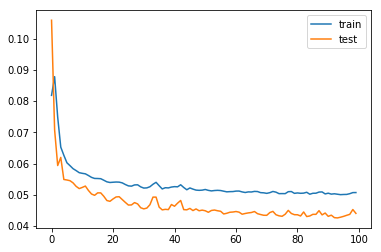

In [108]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [141]:
ypredict = model.predict(test_X)

In [143]:
# inverse transform
def inv_normalization(y):
    inv_y = y
    for i in range(predict_hours):
        #transform to raw shape (, 5)
        y_ = y[:, i]
        y_ = y_.reshape(len(y), 1)
        raw_ = np.concatenate((y_, test_X[:, -4:]), axis=1)
        inv_ = scaler.inverse_transform(raw_)
        inv_y[:, i] = inv_[:, 0]
    return inv_y

In [144]:
test_X = test_X.reshape((test_X.shape[0], lag_hours*n_features))
# invert scaling for forecast
pm25_predict = inv_normalization(ypredict)
# invert scaling for actual
test_y = test_y.reshape(len(test_y), predict_hours)
pm25_actual = inv_normalization(test_y)

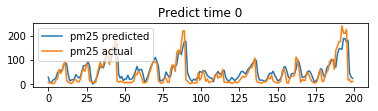

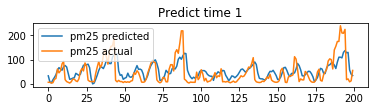

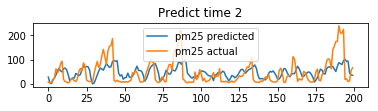

In [151]:
for i in range(predict_hours):
    plt.subplot(predict_hours, 1, i+1)
    plt.plot(pm25_predict[-200:, i], '-', label = 'pm25 predicted')
    plt.plot(pm25_actual[-200:, i], '-', label = 'pm25 actual')
    plt.legend()
    plt.title('Predict time '+ str(i))
    plt.show()

In [146]:
pm25_predict.shape

(500, 3)

In [142]:
ypredict

array([[0.07403421, 0.07887576, 0.07690275],
       [0.08376514, 0.08284387, 0.07804673],
       [0.08684049, 0.07959783, 0.07127094],
       ...,
       [0.06440486, 0.08039207, 0.0601436 ],
       [0.03982145, 0.05470458, 0.04826782],
       [0.0314076 , 0.04594938, 0.04680354]], dtype=float32)

## 2. consider future meteorology

In [ ]:
# split into train and test sets
values = reframed.values
# Use data of one year as training set
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
# split into input and outputs
train_X, train_y = train[:, :lag_hours * n_features], train[:, [-n_features * 3, -n_features * 2, -n_features]]
test_X, test_y = test[:, :lag_hours * n_features], test[:, [-n_features * 3, -n_features * 2, -n_features]]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], lag_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], lag_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)